# Quantum Mechanics

In the last lecture, we have modeled electromagnetic waves noit by solving the wave equation, but by taking the solutions of wave equations. Today we will solve a wave equation, but not for electromagnetic waves, but for matter waves. We will solve the stationary Schrödinger equation with the implicit solution scheme. With the help of that we will tackle the particle in a box, the harmonic oscillator and the periodic potential. All of these problems have also analytical solutions, thus we do not need the numerical solution. But it will give us some practice on how to tackle such problems. As not all of you might be familiar with the physical description of quantum mechanics, we will give a short introduction into this field first. 


In [4]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 


## Quantum Mechanics in a Nutshell

Quantum Mechanics assumes that all particles propagate as waves. They are therefore described by a wavefunction $\Psi(x,t)$. A quantum mechanical object posseses an amplitude and a phase and propagates in space and time. One could see the wavefunction in analogy to the electric field $\vec{E}(x)$ of an electromagnetic wave. As the square of the electric field describes the propagation of energy of a wave, the square magnitude of the wavefunction, i.e. $|\Psi(x,t)|^2$, describes the propagation of probability density. The wavefunction itself is thus just the probability amplitude. 

### Time dependent Schrödinger equation

The dynamics of a quantum mechanical wave is described by the time dependent Schrödinger equation

\begin{equation}
-i\hbar\frac{\partial \Psi(x,t)}{\partial t} = \left ( \frac{-\hbar^2 }{2m}\frac{\partial^2}{\partial x^2}+V(x,t) \right ) \Psi(x,t)
\end{equation}

whis is written here for one dimension only.

The bracket on the right side of the above equation contains the so-called Hamilton operator $\hat{H}$.
The Hamilton operator $\hat{H}$ contains the energy operators for the kinetic and potential energies and represents the total energy of the system.

\begin{equation}
\hat{H}=\left ( \frac{-\hbar^2 }{2m}\frac{\partial^2}{\partial x^2}+V(x,t) \right )
\end{equation}

### Stationary Schrödinger equation

Our first problems will be stationary problems. We will not ask for the temporal development of the particle position. We will rather ask, what solutions without timedependence are possible. In general this is much like the question asking what kind of standing waves are possible on a string or in an optical resonator. 
In quantum mechanics the boundaries, which define the standing waves are formed by the potential energy $V(x)$.

We therefore also need the stationary Schrödinger equation, where the left side of the tome dependent Schrödinger equation does not depend on time, hence is constant in time. This stationary (time-independent) Schrödinger equation is

\begin{equation}
\hat{H}\Psi(x)=E\Psi(x)
\end{equation}

The Hamilton operator $\hat{H}$ gives a recipe how to calculate the energies for a given wavefunction $\Psi(x)$ in terms of derivates or multiplications by functions. If this recipe results in just a multiplication of the wave function with a number $E$, then these wavefunctions are eigenfunction of the Hamilton operator and the values of $E$ are the eigenvalues of the problem, i.e. the time-independent solutions of this differential equation.

## Recap: Implicit Solution

According to our above description, the Hamilton operator $\hat{H}$ contains two parts, a second derivative in the position, which represents the kinetic energy and the potential energy operator $V(x)$, which is in the simplest case just a function of $x$.

\begin{equation}
\left ( \frac{-\hbar^2 }{2m}\frac{\partial^2}{\partial x^2}+V(x) \right ) \Psi(x)=E\Psi(x)
\end{equation}

Since we want to apply our implicit solution scheme (Cranck Nicolson), we need to represent both parts as matrices. 

### Kinetic energy 

We remember that we can write the second derivative approximation of our wavefunction $\Psi(x)$ in the finite difference version

\begin{equation}
\Psi^{''}(x)=\frac{\Psi(x+\delta x)-2\Psi(x)+\Psi(x-\delta x)}{\delta x^{2}}
\end{equation}

If we want to evaluate the wavefunction at certain positions $x_{i}$, then this second deraívative translates into 

$T\Psi=\frac{d^2}{dx^2}\Psi=\frac{1}{\delta x^2}
\begin{bmatrix}
-2 & 1  & 0 & 0 & 0 & 0\\
 1 & -2 & 1 & 0 & 0 & 0\\
 0 & 1  & -2 & 1 & 0 & 0\\
 0 & 0  & 1  & -2 & 1 & 0\\
 0 & 0  & 0  &  1 & -2 & 1\\
 0 & 0  & 0  &  0 &  1 & -2\\
\end{bmatrix}
\begin{bmatrix}
\Psi(x_{1})\\
\Psi(x_{2})\\
\Psi(x_{3})\\
\Psi(x_{4})\\
\Psi(x_{5})\\
\Psi(x_{6})
\end{bmatrix}$

if we just use 6 positions. Please remember, that in the version above, we have imposed already boundary conditions in the first and the last row, which are $\Psi(x_{0})=0$ and $\Psi(x_{7})=0$. If we multiply this matrix by $\hbar^{2}/2m$, we obtain the kinetic energy. 

### Potential energy

The potential energy values are just values at the diagonal of the matrix

$V\Psi=
\begin{bmatrix}
 V(x_{1}) & 0  & 0 & 0 & 0 & 0\\
 0 & V(x_{2}) & 0 & 0 & 0 & 0\\
 0 & 0  & V(x_{3}) & 0 & 0 & 0\\
 0 & 0  & 0  & V(x_{4}) & 0 & 0\\
 0 & 0  & 0  &  0 & V(x_{5}) & 0\\
 0 & 0  & 0  &  0 &  0 & V(x_{6})\\
\end{bmatrix}
\begin{bmatrix}
\Psi(x_{1})\\
\Psi(x_{2})\\
\Psi(x_{3})\\
\Psi(x_{4})\\
\Psi(x_{5})\\
\Psi(x_{6})
\end{bmatrix}$

an you may insert the specific potential energy values for your particular problem here. 

Our final problem $\hat{H}\Psi=E\Psi$ will thus have the following shape

$
\begin{bmatrix}
 -2+V(x_{1}) & 1  & 0 & 0 & 0 & 0\\
 1 & -2+V(x_{2}) & 1 & 0 & 0 & 0\\
 0 & 1 & -2+V(x_{3})  & 1 & 0 & 0 \\
 0 &0 & 1  & -2+V(x_{4})  & 1 & 0 \\
 0 & 0 & 0  & 1  &  -2+V(x_{5}) & 1 \\
 0 & 0 & 0  & 0  &  1 &  -2+V(x_{6}) \\
\end{bmatrix}
\begin{bmatrix}
\Psi(x_{1})\\
\Psi(x_{2})\\
\Psi(x_{3})\\
\Psi(x_{4})\\
\Psi(x_{5})\\
\Psi(x_{6})
\end{bmatrix}=E
\begin{bmatrix}
\Psi(x_{1})\\
\Psi(x_{2})\\
\Psi(x_{3})\\
\Psi(x_{4})\\
\Psi(x_{5})\\
\Psi(x_{6})
\end{bmatrix}$

This is the final system of coupled equations which we can supply to any matrix solver. We will use a solver from the *scipy.linalg* module. In case we have special boundary conditions, we need to take them into account and replace the first and the last line for example with the particular boundary conditions. 

## Particle in a box

Let's apply the whole thing to the problem of a particle in a box. This means, we look at a quantum mechanical object in a potential well. The problem is sketched below.

![Particle in a Box](particle_in_box.png)

We need to define this rectangular box with zero potential energy inside the box and finite potential energy outside. Since the quantum mechanical object is a wave, we expect that only certain standing waves of particular wavelength can exist inside the box. These waves are connected to certain probability densities of finding the particle at certain positions and specific energy values. These are the energy levels, which are often so characteristic of the quantum realm.

Before we start, we need to define some quantities:

* we will study a box of d=1 nm in width in a domain of L=5 nm
* we will use N=1001 points for our $x_{i}$
* our potential energy shall have a barrier height of 1 eV

In [103]:
# define some useful constants
hbar=1.678e-35 #joule seconds
m_e=9.10938356e-31 # kg
V_0=1.602e-19 # J

d=1e-9 # m
L= 10e-9 #m

x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]

Then we create the potential energy matrix.

In [104]:
U_vec = np.zeros(N)
U_vec[np.abs(x)>d/2]=V_0

# potential energy is only on the diagonal, no deritvative
U = diags([U_vec], [0])

Last thing is the kinetic energy matrix.

In [105]:
# T is the finite difference2 representation of the second derivative in the kinetic energy
T = -hbar**2*diags([-2., 1., 1.], [0,-1, 1], shape=(N, N))/dx**2/2/m_e

An finally the total Hamilton operator matrix.

In [106]:
# Sum of kinetic and potential energy
H = T + U

The last step is to solve the system of coupled equations usering the `eigsh` method of the `scipy`
module. We can already anticipate that we get multiple solution, e.g. multiple wavelength that fit inside the box. So there must be a certain number of eigenvalues. The method `eigsh` allows to specify the number of eigenvalues and eigenfunctions $n$ we would like to calculate. 

In [124]:

# diagonalize the matrix and take the first n eigenvalues and eigenvectors
n=20
vals, vecs = eigsh(H, k=n,which='SM')

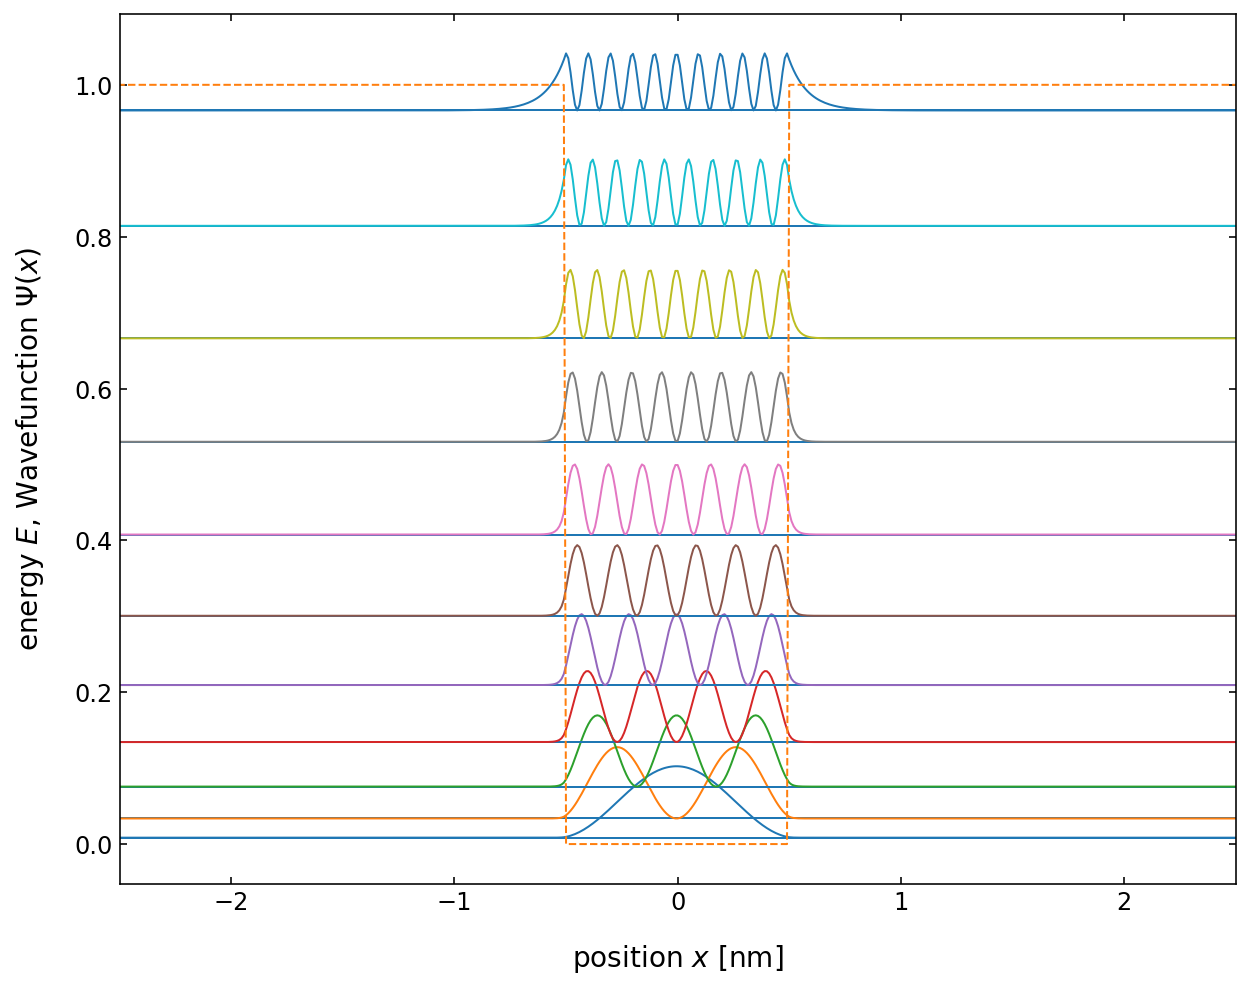

In [136]:
# define some scaling to make a nice plot
scale=1e9 # position scale
escale=6.242e18 # energy scale in eV
psiscale=5 # wavefunction scale 

plt.figure(figsize=(10,8))

for k in range(11):
    vec = vecs[:, k]
    mag = np.sqrt(np.dot(vecs[:, k],vecs[:, k]))
    vec = vec/mag
    plt.axhline(y=vals[k]*escale)
    plt.plot(x*scale, psiscale*np.abs(vec)**2+vals[k]*escale, label=r"$n=%i$"%k)

plt.plot(x*scale,U_vec*escale,'--')
plt.xlabel(r"position $x$ [nm]",fontsize=14)
plt.ylabel(r"energy $E$, Wavefunction $\Psi(x)$",fontsize=14)
plt.tick_params(labelsize=12)
plt.xlim([-L/4*scale,L/4*scale])
#plt.ylim([0,1])
#plt.legend()    
plt.show()

The diagram shows the corresponding energy states (the eigenvalues of the solution) and the value $|\Psi|^2$, which gives the probability to find the particle inside the box. The latter shows, that in contrast to what we expect from classical theory, where we would expect the particle to be with equal probability found at all positions inside the box, we get in quantum mechanics only certain positions at which we would find the particle. Also, the higher the energy state, the more equally is the particle distributed over the box. For a finite box depth, however, we get only a finite number of energy states in which the particle is bound.
A second interesting observation here is that the particle has a finite probability to enter the potential barrier. Especially for the higher energy states, the wavefunction decays exponentially into the barrier. This is similar to the evanescent wave we studied during the last lecture. 

### Energies of bound state

In the case of the particle in a box only certain energies with spatial distributions are allowed. The particle is not everywhere in the box but can only be found in certain regions. The energies which correspond to these distributions are increasing nonlinearly with its index. Below we plot the energy as a function of the index of the energy value. This index is called *quantum number* as we can enumerate the solutions in quantum mechanics. The graph shows that the energy of the bound states increases with the square of the quantum number, i.e. $E_{n}\propto n^2$.


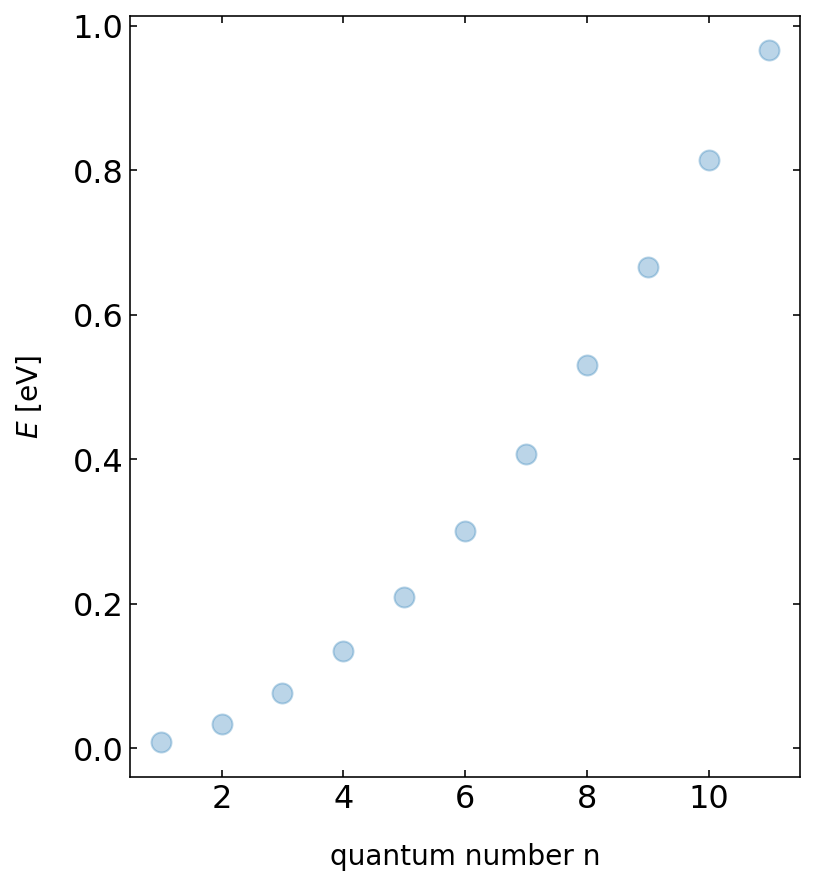

In [135]:
fig = plt.figure(figsize=(6,7))
plt.xlabel('quantum number n',fontsize=14)
plt.ylabel(r"$E$ [eV]",fontsize=14)
plt.plot(np.array(range(len(vals[:11])))+1,vals[:11]*escale,'o',alpha=0.3)

**exercise**

Change the box size and observe the spacing of neighborging energy levels and the number of bound states.

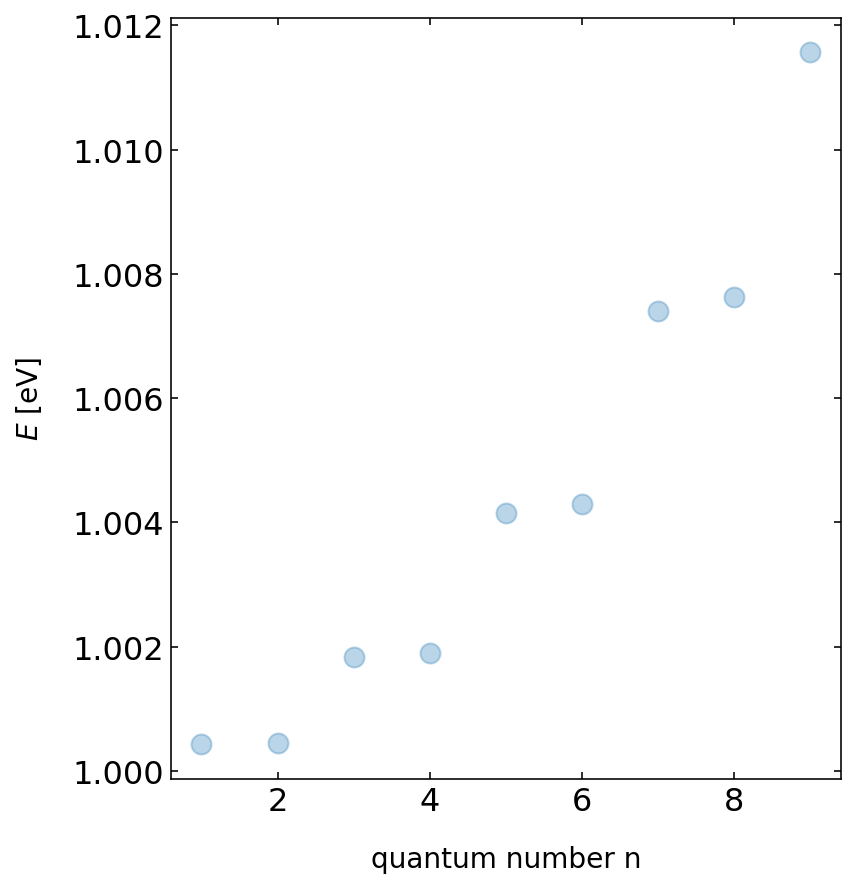

In [137]:
fig = plt.figure(1,figsize=(6,7))
plt.xlabel('quantum number n',fontsize=14)
plt.ylabel(r"$E$ [eV]",fontsize=14)
plt.plot(np.array(range(len(vals[11:])))+1,vals[11:]*escale,'o',alpha=0.3)

In [133]:
def e_diff(a):
    # potential energy for a potential box
    U_vec = np.zeros(N)
    U_vec[np.abs(x)>a/2]=9

    # potential energy is only on the diagonal, no deritvative
    U = diags([U_vec], [0])

    # Sum of kinetic and potential energy
    H = T + U

    # diagonalize the matrix and take the first n eigenvalues and eigenvectors
    n=20
    vals, _ = eigsh(H, k=n,which='SM')
    count=np.sum(vals<9)
    return(count)

In [134]:
a_list=np.linspace(np.pi/4,np.pi*2,10)

In [135]:
states=[e_diff(a) for a in a_list]

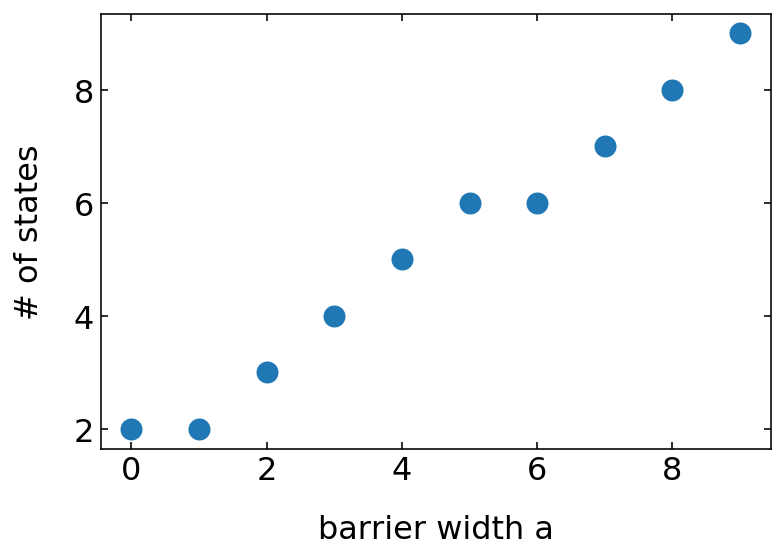

In [139]:
plt.plot(states,'o')
plt.xlabel('barrier width a')
plt.ylabel(r'# of states')
#plt.ylim(0,5)
plt.show()

## Harmonic Oscillator

As compared to the particle in a box, we have to change the potential in the Hamilton operator to solve the harmonic oscillator. The potential energy of the harmonic oscillator is

\begin{equation}
V(x)=\frac{k}{2}x^2
\end{equation}



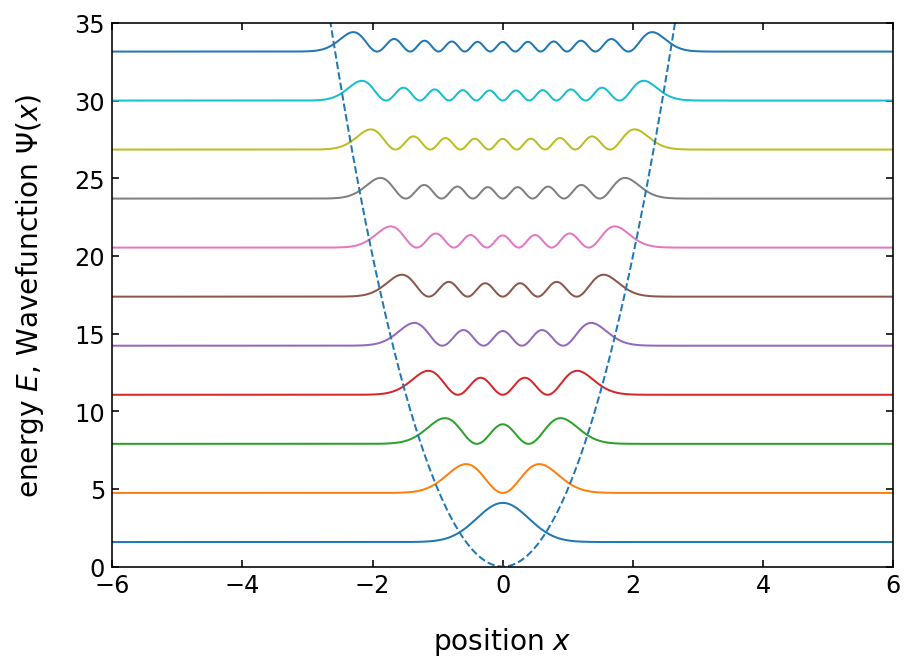

In [157]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

L = 4*np.pi
N = 1001
x = np.linspace(-L, L, N)
dx = x[1] - x[0]

# T is the finite difference2 representation of the second derivative in the kinetic energy
T = -0.5*diags([-2., 1., 1.], [0,-1, 1], shape=(N, N))/dx**2

# potential energy for the harmonic oscillator
U_vec = 5*x**2

# potential energy is only on the diagonal, no deritvative
U = diags([U_vec], [0])

# Sum of kinetic and potential energy
H = T + U

# diagonalize the matrix and take the first n eigenvalues and eigenvectors
n=20
vals, vecs = eigsh(H, k=n,which='SM')

plt.figure(figsize=(7,5))
for k in range(n):
    vec = vecs[:, k]
    mag = np.sqrt(np.dot(vecs[:, k],vecs[:, k]))
    vec = vec/mag
    plt.plot(x, 100*np.abs(vec)**2+vals[k], label=r"$n=%i$"%k)

plt.plot(x,U_vec,'--')
plt.xlabel(r"position $x$",fontsize=14)
plt.ylabel(r"energy $E$, Wavefunction $\Psi(x)$",fontsize=14)
plt.tick_params(labelsize=12)
plt.xlim([-6,6])
plt.ylim([0,35])
#plt.legend()    
plt.show()

**exercise**

Compare the distance between neighboring energy levels to the particle in a box solution. Analyze the difference between neighboring energy levels as a function of the stiffnesse ($k$) of the harmonic oscillator.


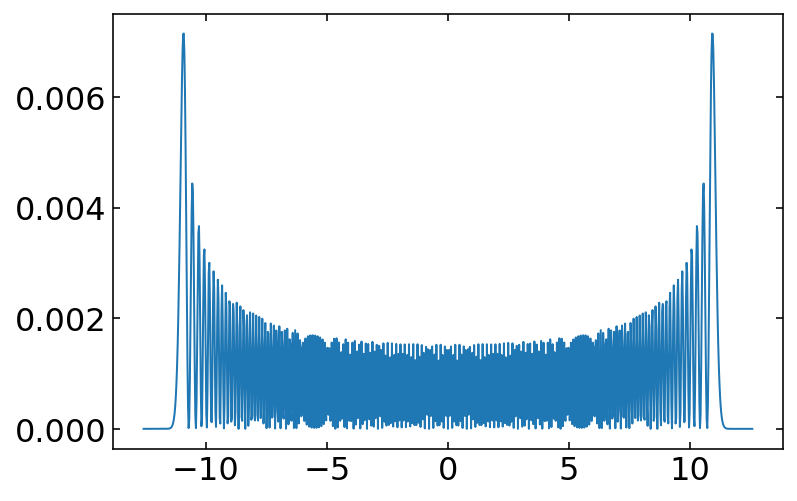

In [155]:
plt.plot(x,np.abs(vecs[:,-1])**2)
#plt.xlim(-2,2)

## Periodic Potential

Finally we want to have a look at a system which is contains periodicity, i.e. like an electron in the lattice of a crystal. For this case, we have to create periodic potential. In the realistic case, this is a periodic replication of Coulomb potentials. For simplicity we just introduce a sine function for the potential.
The result of this calculation shall be the appearence of a band structure, like the band structure for electrons in a semiconductor.

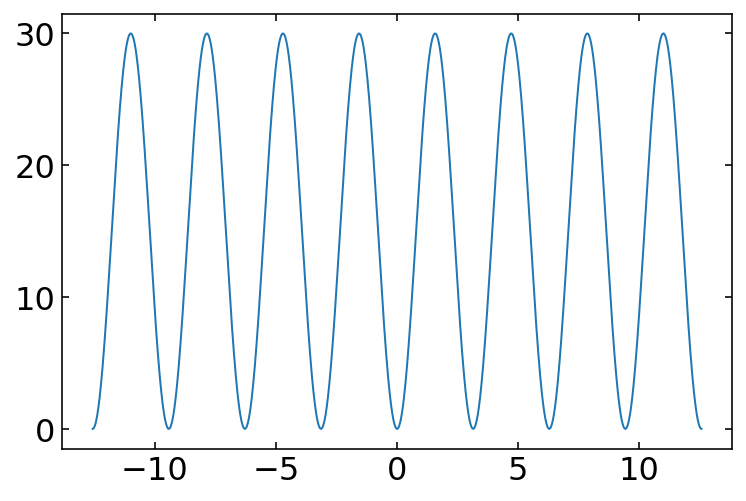

In [163]:
L = 4*np.pi
N = 3001
x = np.linspace(-L, L, N)
U_vec =30*np.sin(x)**2

plt.plot(x,U_vec)

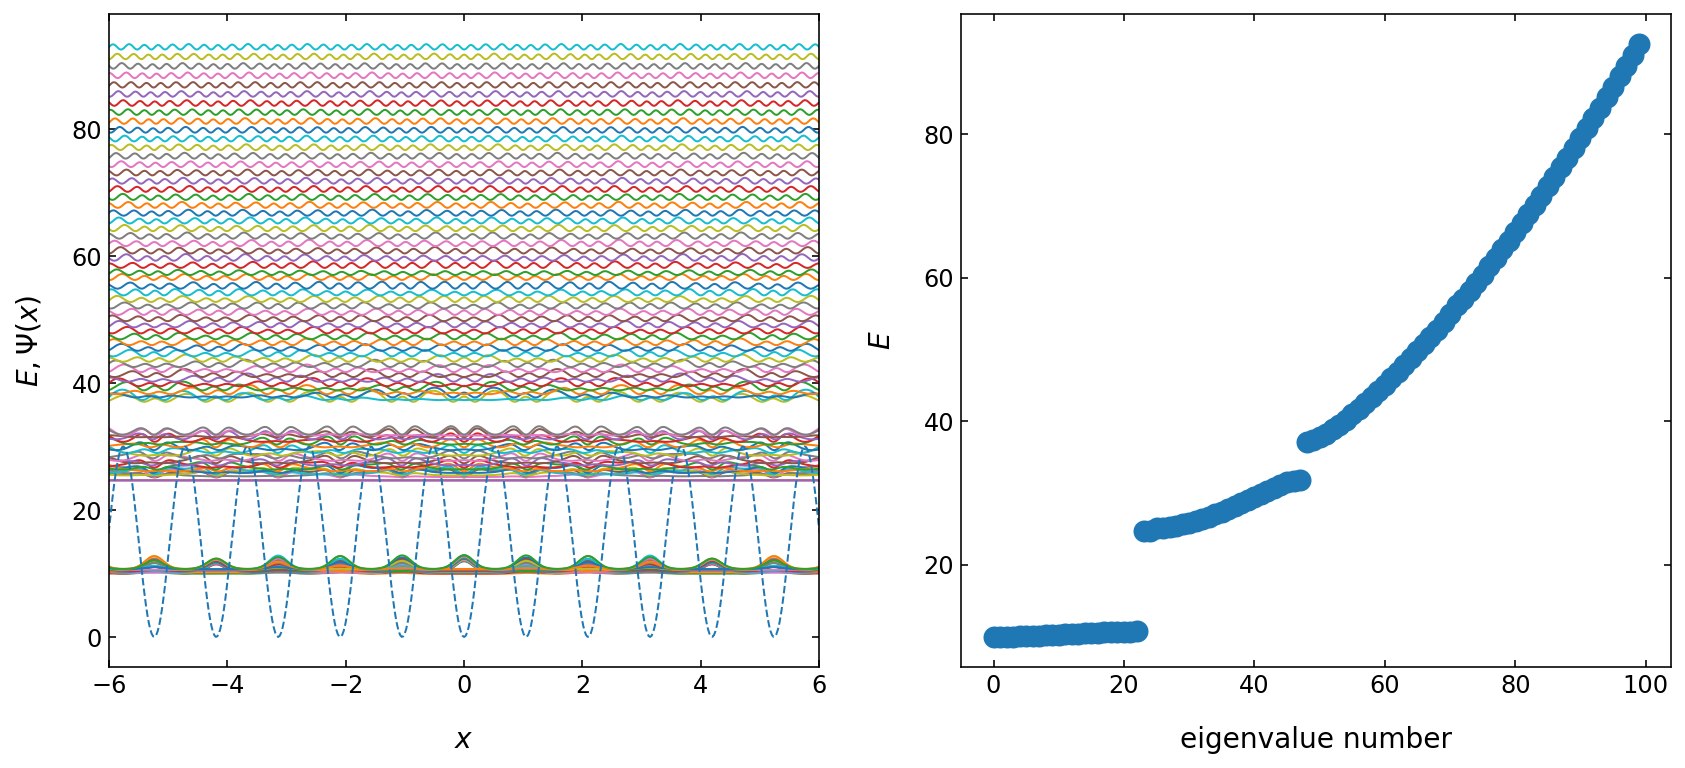

In [24]:

L = 4*np.pi
N = 1001
x = np.linspace(-L, L, N)
dx = x[1] - x[0]

# T is the finite difference representation of the second derivative in the kinetic energy
T = -0.5*diags([-2., 1., 1.], [0,-1, 1], shape=(N, N))/dx**2


# periodic potential for band structure
U_vec =30*np.sin(3*x)**2


# potential energy is only on the diagonal, no deritvative
U = diags([U_vec], [0])

# Sum of kinetic and potential energy
H = T + U

# diagonalize the matrix and take the first n eigenvalues and eigenvectors
n=100
vals, vecs = eigsh(H, k=n,which='SM')

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
for k in range(n):
    vec = vecs[:, k]
    mag = np.sqrt(np.dot(vecs[:, k],vecs[:, k]))
    vec = vec/mag
    plt.plot(x, 400*np.abs(vec)**2+vals[k], label=r"$n=%i$"%k)

    
plt.plot(x,U_vec,'--')
plt.xlabel(r"$x$",fontsize=14)
plt.ylabel(r"$E, \Psi(x)$",fontsize=14)
plt.tick_params(labelsize=12)
plt.xlim([-6,6])
#plt.ylim([0,30])
#plt.legend()   

plt.subplot(1,2,2)
plt.xlabel('eigenvalue number',fontsize=14)
plt.ylabel(r"$E$",fontsize=14)
plt.tick_params(labelsize=12)
#plt.ylim([0,30])
plt.plot(vals,'o')

plt.show()

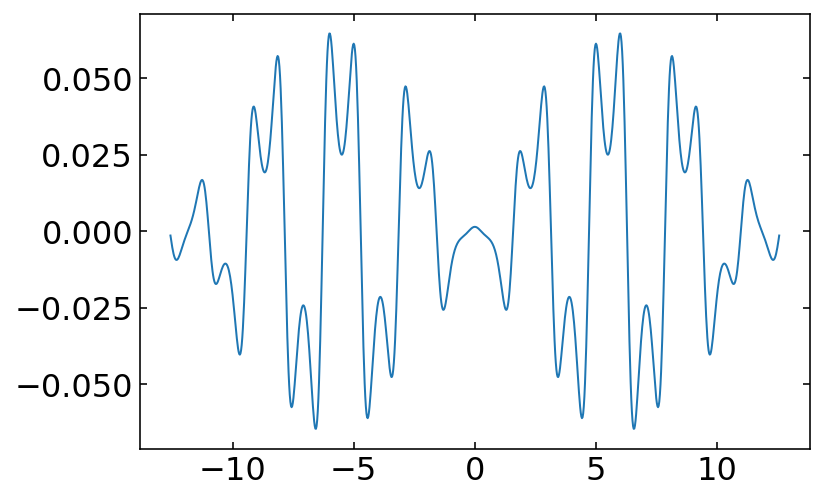

In [14]:
plt.plot(x,vecs[:,18])

**exercise**

analyze the structure of the energy levels as a function of the number of minima in the spatial region

In [49]:
## code goes here

**exercise**

change the potential to a finite chain of coulomb potentials

In [50]:
## code goes here 